In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import glob
import cv2  

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!unzip "gdrive/My Drive/facial/data.zip"

Archive:  gdrive/My Drive/facial/data.zip
replace Dataset/labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
path1 = glob.glob("Dataset/train/surprise/*.png")
X_train = np.zeros((31806,48,48))
Y_train = np.zeros((31806,1))
k = 0
for i in path1 :
  img = cv2.imread(i,0)
  #print(type(img))
  X_train[k,:,:] = np.copy(img)
  Y_train[k,:] = 0
  k = k + 1
  print(k)
path2 = glob.glob("Dataset/train/anger/*.png")
for i in path2 :
  img = cv2.imread(i,0)
  #print(type(img))
  X_train[k,:,:] = np.copy(img)
  Y_train[k,:] = 1
  k = k + 1
  print(k)
path3 = glob.glob("Dataset/train/happiness/*.png")
for i in path3 :
  img = cv2.imread(i,0)
  #print(type(img))
  X_train[k,:,:] = np.copy(img)
  Y_train[k,:] = 2
  k = k + 1
  print(k)
path4 = glob.glob("Dataset/train/neutral/*.png")
for i in path4 :
  img = cv2.imread(i,0)
  #print(type(img))
  X_train[k,:,:] = np.copy(img)
  Y_train[k,:] = 3
  k = k + 1
  print(k)
path5 = glob.glob("Dataset/train/fear/*.png")
for i in path5 :
  img = cv2.imread(i,0)
  #print(type(img))
  X_train[k,:,:] = np.copy(img)
  Y_train[k,:] = 4
  k = k + 1
  print(k)
path6 = glob.glob("Dataset/train/sadness/*.png")
for i in path6 :
  img = cv2.imread(i,0)
  #print(type(img))
  X_train[k,:,:] = np.copy(img)
  Y_train[k,:] = 5
  k = k + 1
  print(k)

Streaming output truncated to the last 5000 lines.
26808
26809
26810
26811
26812
26813
26814
26815
26816
26817
26818
26819
26820
26821
26822
26823
26824
26825
26826
26827
26828
26829
26830
26831
26832
26833
26834
26835
26836
26837
26838
26839
26840
26841
26842
26843
26844
26845
26846
26847
26848
26849
26850
26851
26852
26853
26854
26855
26856
26857
26858
26859
26860
26861
26862
26863
26864
26865
26866
26867
26868
26869
26870
26871
26872
26873
26874
26875
26876
26877
26878
26879
26880
26881
26882
26883
26884
26885
26886
26887
26888
26889
26890
26891
26892
26893
26894
26895
26896
26897
26898
26899
26900
26901
26902
26903
26904
26905
26906
26907
26908
26909
26910
26911
26912
26913
26914
26915
26916
26917
26918
26919
26920
26921
26922
26923
26924
26925
26926
26927
26928
26929
26930
26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
2

In [ ]:
X_train = X_train/255

In [ ]:
X_train = np.reshape(X_train,(31806,48*48)).T
Y_train = Y_train.T
print(X_train.shape)
print(Y_train.shape)

(2304, 31806)
(1, 31806)


In [ ]:
shape = (31806, 6)
one_hot = np.zeros(shape)
rows = np.arange(31806)
one_hot[rows, Y_train.astype(int)] = 1
Y_train = one_hot.T
shuffle_index = np.random.permutation(X_train.shape[1])
X_train,Y_train = X_train[:,shuffle_index] , Y_train[:,shuffle_index]
print(X_train.shape)
print(Y_train.shape)
n = X_train.shape[0]
m = X_train.shape[1]

(2304, 31806)
(6, 31806)


In [ ]:
print(Y_train)

[[1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
def softmax(x) :
  x = x - np.max(x)
  return np.exp(x) / np.sum(np.exp(x), axis=0,keepdims=True)
def relu(X) :
  X[X<0]=0
  return X
def initialize_wts(struct) :
  W = {}
  b = {}
  for i in range(1,len(struct)) :
    W["W" + str(i)] = np.random.randn(struct[i],struct[i-1])*np.sqrt(2/struct[i-1])
    #W["W" + str(i)] = np.random.randn(struct[i],struct[i-1])*0.01
    #W["W" + str(i)] = np.random.rand(struct[i],struct[i-1])
    b["b" + str(i)] = np.zeros((struct[i],1))
  return W,b
def forward_prop(X_train,W,b) :
  return relu(np.dot(W,X_train) + b)

In [ ]:
def model(struct,X_train,Y_train,lr,W,b,num_itr) :
  n = X_train.shape[0]
  m = X_train.shape[1]
  
  cost1 = 50
  for k in range(0,num_itr) :
    A = {}
    A["A" + str(0)] = np.copy(X_train)
    for i in range(1,len(struct)-1) :
      A["A" + str(i)] = forward_prop(A["A" + str(i-1)],W["W" + str(i)],b["b" + str(i)])
    A["A" + str(len(struct) - 1)] = softmax(np.dot(W["W" + str(len(struct) - 1)] , A["A" + str(len(struct) - 2)]) + b["b" + str(len(struct) - 1)])
    dW = {}
    db = {}
    dZ = {}
    dZ["dZ" + str(len(struct) - 1)] = A["A" + str(len(struct) - 1)] - Y_train
    dW["dW" + str(len(struct) - 1)] = (1/m)*(np.dot(dZ["dZ" + str(len(struct) - 1)],A["A" + str(len(struct) - 2)].T))
    db["db" + str(len(struct) - 1)] = (1/m)*(np.sum(dZ["dZ" + str(len(struct) - 1)],axis = 1, keepdims = True))
    for i in range(0,len(W) - 1) :
      dZ["dZ" + str(len(W) - 1 - i)] = np.dot(W["W" + str(len(W) - i)].T,dZ["dZ" + str(len(W) - i)])*np.int64(A["A" + str(len(W) - 1 - i)] > 0)
      dW["dW" + str(len(W) - 1 - i)] = (1/m)*np.dot(dZ["dZ" + str(len(W) - 1 - i)] , A["A" + str(len(W) - 1 - i - 1)].T)
      db["db" + str(len(W) - i - 1)] = (1/m)*np.sum(dZ["dZ" + str(len(W) - 1 - i)],axis = 1,keepdims = True)
    for i in range(1,len(W) + 1) :
      W["W" + str(i)] = W["W" + str(i)] - lr*dW["dW" + str(i)]
      b["b" + str(i)] = b["b" + str(i)] - lr*db["db" + str(i)]
    #cost1 = (-1/m)*np.sum(np.dot(Y_train,np.log(A["A" + str(len(struct) - 1)]).T) + np.dot(1 - Y_train,np.log(1 - A["A" + str(len(struct) - 1)]).T))
    cost1 = -np.mean(Y_train * np.log(A["A" + str(len(struct) - 1)] + 1e-8))
    #log_likelihood = -np.log(A["A" + str(len(struct) - 1)][range(m),Y_train])
    #cost1 = np.sum(log_likelihood) / m
    #costu.append(float(cost1))
    #print("Cost after {}th iteration is : {} {}".format(k,cost1,lr))
  #plt.plot(list(range(num_itr)) , costu)
  #plt.show()
  return W,b,A["A" + str(len(struct) - 1)],float(cost1)

In [ ]:
def train(struct,X_train,Y_train,lr,epoks,batch_size):
  costu = []
  W,b = initialize_wts(struct)
  for j in range(0,epoks) :
    for i in range(0,int(X_train.shape[1]/batch_size)+1) :
      if i != int(X_train.shape[1]/batch_size) :
        X_batch = X_train[:,i*batch_size:(i+1)*batch_size]
        Y_batch = Y_train[:,i*batch_size:(i+1)*batch_size]
        lim = (i+1)*batch_size
      elif i*batch_size == X_train.shape[1] :
        continue
      else :
        X_batch = X_train[:,i*batch_size:-1]
        Y_batch = Y_train[:,i*batch_size:-1]
        lim = X_train.shape[1]
      W,b,A,cost1 = model(struct , X_batch , Y_batch , lr ,W,b,num_itr = 1)
      costu.append(cost1)
      print("Epok : {}  Data_Passed : {}/{}  Train_Loss : {}".format(j+1,lim,X_train.shape[1],cost1))
  A = {}
  A["A" + str(0)] = np.copy(X_train)
  for i in range(1,len(struct)-1) :
    A["A" + str(i)] = forward_prop(A["A" + str(i-1)],W["W" + str(i)],b["b" + str(i)])
  A = softmax(np.dot(W["W" + str(len(struct) - 1)] , A["A" + str(len(struct) - 2)]) + b["b" + str(len(struct) - 1)])
  plt.plot(list(range(len(costu))),costu)
  return W,b,A

Streaming output truncated to the last 5000 lines.
Epok : 5  Data_Passed : 30016/31806  Train_Loss : 0.24637421997725217
Epok : 5  Data_Passed : 30080/31806  Train_Loss : 0.2621346541649659
Epok : 5  Data_Passed : 30144/31806  Train_Loss : 0.25940579125117885
Epok : 5  Data_Passed : 30208/31806  Train_Loss : 0.2635719816164594
Epok : 5  Data_Passed : 30272/31806  Train_Loss : 0.28047325424859654
Epok : 5  Data_Passed : 30336/31806  Train_Loss : 0.25723321060425947
Epok : 5  Data_Passed : 30400/31806  Train_Loss : 0.28108302904730315
Epok : 5  Data_Passed : 30464/31806  Train_Loss : 0.2611959833061337
Epok : 5  Data_Passed : 30528/31806  Train_Loss : 0.23009527478986327
Epok : 5  Data_Passed : 30592/31806  Train_Loss : 0.28679780094231977
Epok : 5  Data_Passed : 30656/31806  Train_Loss : 0.2670368753336341
Epok : 5  Data_Passed : 30720/31806  Train_Loss : 0.28717423589271684
Epok : 5  Data_Passed : 30784/31806  Train_Loss : 0.26675999733053685
Epok : 5  Data_Passed : 30848/31806  Train_

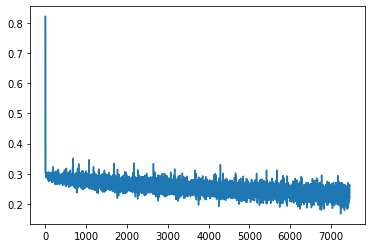

In [ ]:
W,b,A = train([n,1152,500,100,6],X_train,Y_train,0.1,15,64)

In [ ]:
def get_output(X,W,b) :
  struct = len(W) + 1
  A = {}
  A["A" + str(0)] = np.copy(X)
  for i in range(1,struct-1) :
    A["A" + str(i)] = forward_prop(A["A" + str(i-1)],W["W" + str(i)],b["b" + str(i)])
  A["A" + str(struct - 1)] = softmax(np.dot(W["W" + str(struct - 1)] , A["A" + str(struct - 2)]) + b["b" + str(struct - 1)])
  return A["A" + str(struct - 1)]

In [ ]:
def predict(A,Y) :
  for i in range(0,A.shape[1]) :
    a = np.max(A[:,i])
    A[:,i] = (A[:,i] == a)
  fai = np.absolute(A - Y)
  count = 0
  for i in range(0,fai.shape[1]) :
    if np.sum(fai[:,i]) == 0 :
      count += 1
  return (count/A.shape[1])*100

In [ ]:
A_train = get_output(X_train,W,b)
#A_test  = get_output(X_test,W,b)
print("Train accuracy is {}".format(predict(A_train,Y_train)))
#print("Test accuracy is {}".format(predict(A_test,Y_test)))

Train accuracy is 45.78381437464629
